In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import arviz as az

### Q1

In [16]:
rng = np.random.default_rng(1)

obs = 1000000
burn = 1000

# params
y = 0.7

# inits
theta_1 = 2.0
theta_2 = 0.2
nu = 0.4

theta_1s = np.zeros(obs)
theta_2s = np.zeros(obs)
nu_s = np.zeros(obs)


randn = rng.standard_normal(obs)

def gen_theta_1(theta_2, nu):
  mu = (y - theta_2) / (1.0 + 1.0/(nu**2))
  sigma = 1.0/(1.0 + 1.0/nu**2)
  return rng.normal(mu, sigma)

def gen_theta_2(theta_1, nu):
  mu = (y - theta_1) / (1.0 + 1.0/(nu**2))
  sigma = 1.0/(1.0 + 1.0/nu**2)
  return rng.normal(mu, sigma)

def gen_nu(theta_1, theta_2):
  alpha = 10 + 1
  beta = 0.5*(theta_1**2 + theta_2**2) + 10.0
  return 1.0/rng.gamma(alpha, scale=1/beta)


for i in tqdm(range(obs)):
    theta_1 = gen_theta_1(theta_2, nu)
    theta_2 = gen_theta_2(theta_1, nu)
    nu = gen_nu(theta_1, theta_2)

    theta_1s[i] = theta_1
    theta_2s[i] = theta_2
    nu_s[i] = nu

theta_1s = theta_1s[burn:]
theta_2s = theta_2s[burn:]
nu_s = nu_s[burn:]

  0%|          | 0/1000000 [00:00<?, ?it/s]

theta_1_mean=0.23509919314813094
theta_2_mean=0.22266121529912059
nu_s_mean=1.0461581608291832


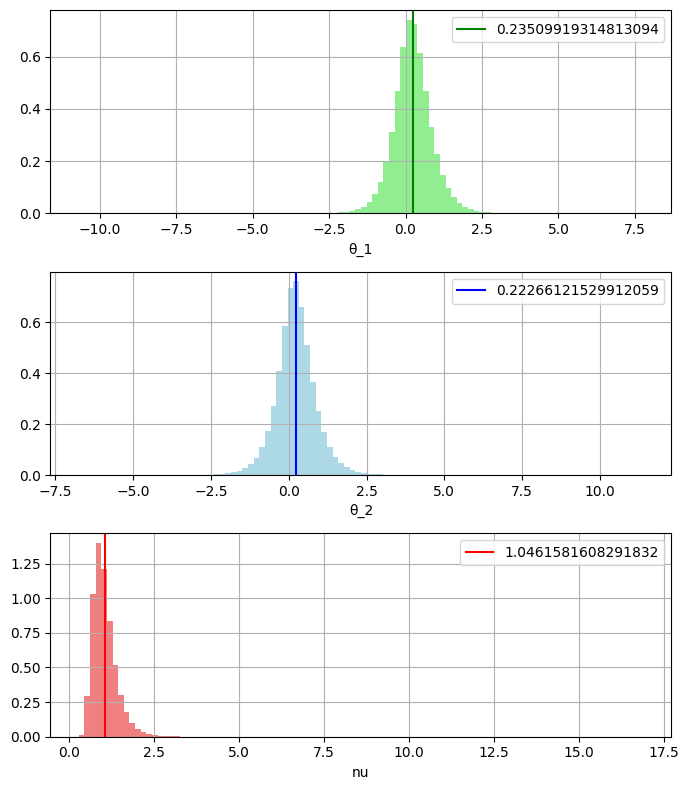

In [17]:
theta_1_mean = np.mean(theta_1s)
theta_2_mean = np.mean(theta_2s)
nu_s_mean = np.mean(nu_s)

print(f"{theta_1_mean=}")
print(f"{theta_2_mean=}")
print(f"{nu_s_mean=}")

# posterior densities
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 8))

ax1.grid(True)
ax1.axvline(x = theta_1_mean, color = 'g', label = theta_1_mean)
ax1.hist(theta_1s, color="lightgreen", density=True, bins=100)
ax1.set_xlabel("θ_1")
ax1.legend()

ax2.grid(True)
ax2.axvline(x = theta_2_mean, color = 'b', label = theta_2_mean)
ax2.hist(theta_2s, color="lightblue", density=True, bins=100)
ax2.set_xlabel("θ_2")
ax2.legend()

ax3.grid(True)
ax3.axvline(x = nu_s_mean, color = 'r', label = nu_s_mean)
ax3.hist(nu_s, color="lightcoral", density=True, bins=100)
ax3.set_xlabel("nu")
ax3.legend()

fig.tight_layout()
plt.show()

In [18]:
print({
    'theta_1': az.hdi(theta_1s, hdi_prob=0.95),
    'theta_2': az.hdi(theta_2s, hdi_prob=0.95),
    'nu': az.hdi(nu_s, hdi_prob=0.95),
})

{'theta_1': array([-1.03967106,  1.53787597]), 'theta_2': array([-1.0716036 ,  1.57128349]), 'nu': array([0.49793731, 1.75834382])}


#Q2